__Pandas Tutorial__

In [102]:
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [103]:
data = pd.read_csv('bank-full.csv',sep=";", skipinitialspace=True)

In [104]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [105]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [106]:
print("Number of rows",data.shape[0])

Number of rows 45211


In [107]:
print("Number of features/columns",data.shape[1])

Number of features/columns 17


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [109]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


__Checking for missing values__

In [110]:
val=data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=data.dropna()
else:
    print("No missing values present")

No missing values present


__Finding unique data__

In [111]:
data.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [112]:
#Find Mean
data.mean()


C:\Users\patil\AppData\Local\Temp/ipykernel_22892/2397123149.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [113]:
#Find Median
data.median()

C:\Users\patil\AppData\Local\Temp/ipykernel_22892/2794223296.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [114]:
#Find Standard Deviation
data.std()

C:\Users\patil\AppData\Local\Temp/ipykernel_22892/2827995331.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

__Pair Plot__

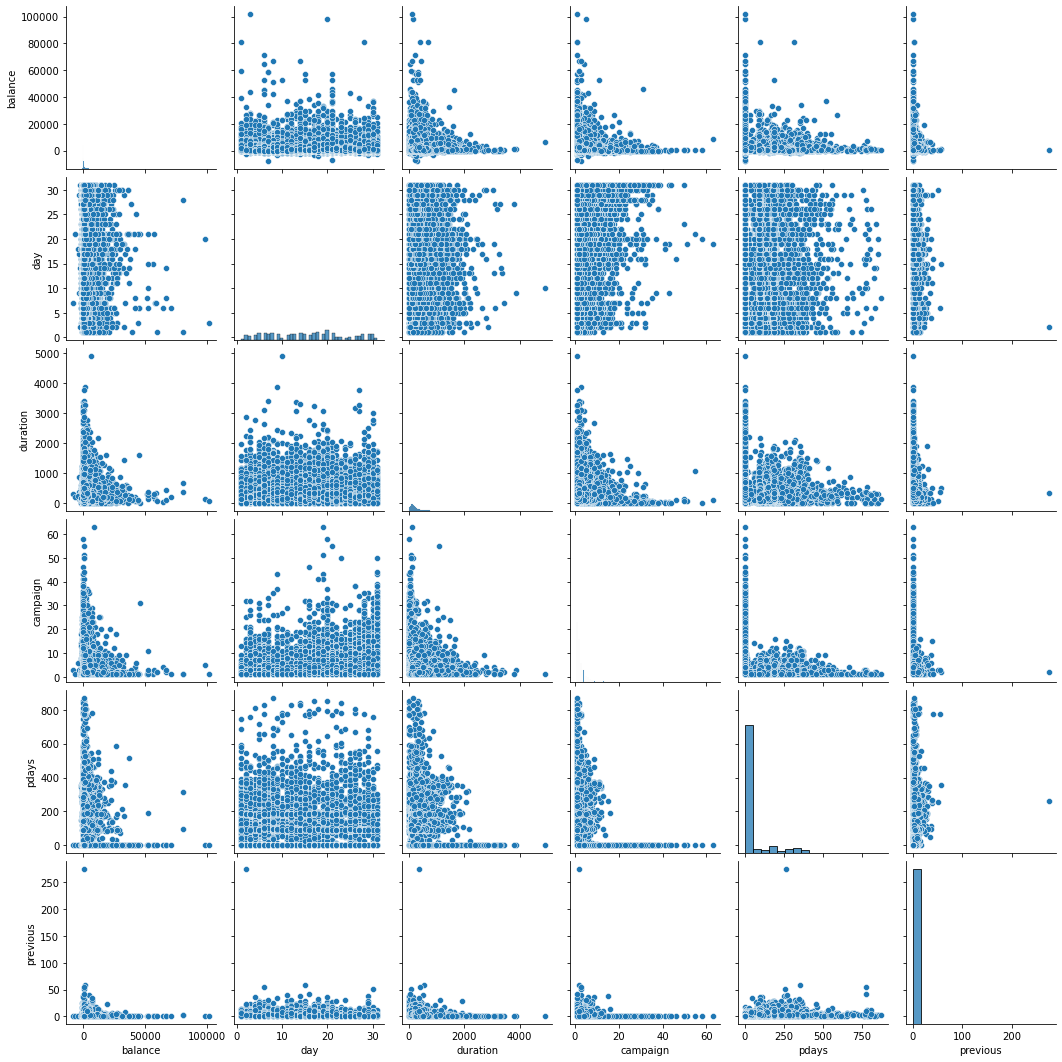

In [115]:
sns.pairplot(data.iloc[:,1:])


__Checking Outliers__

In [116]:
print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())

Min age:  95
Max age:  18


Text(0.5, 1.0, 'Age Distribution')

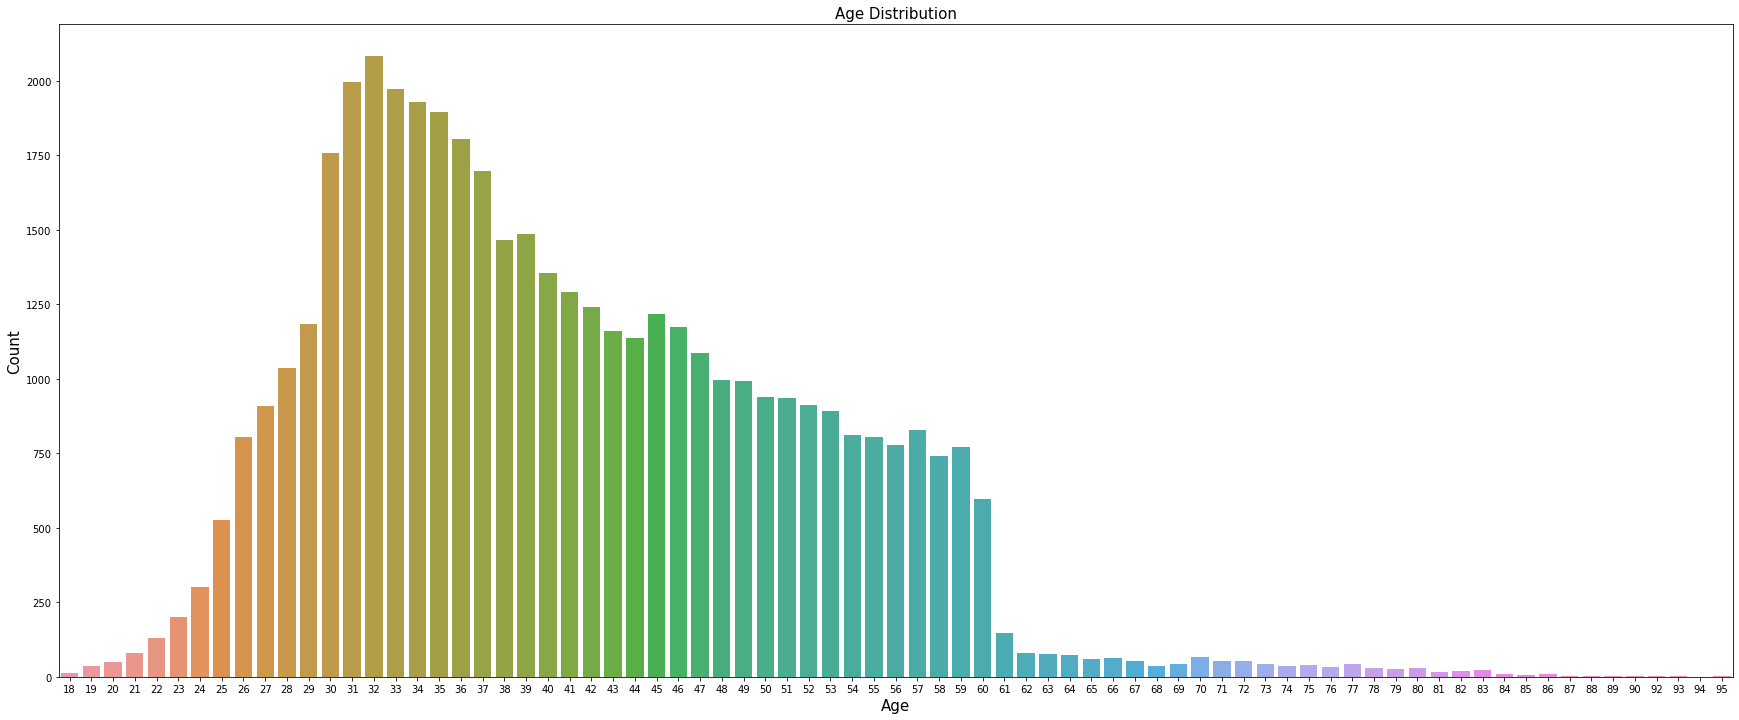

In [117]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age', data = data)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

__Job__

Text(0.5, 1.0, 'Job Distribution')

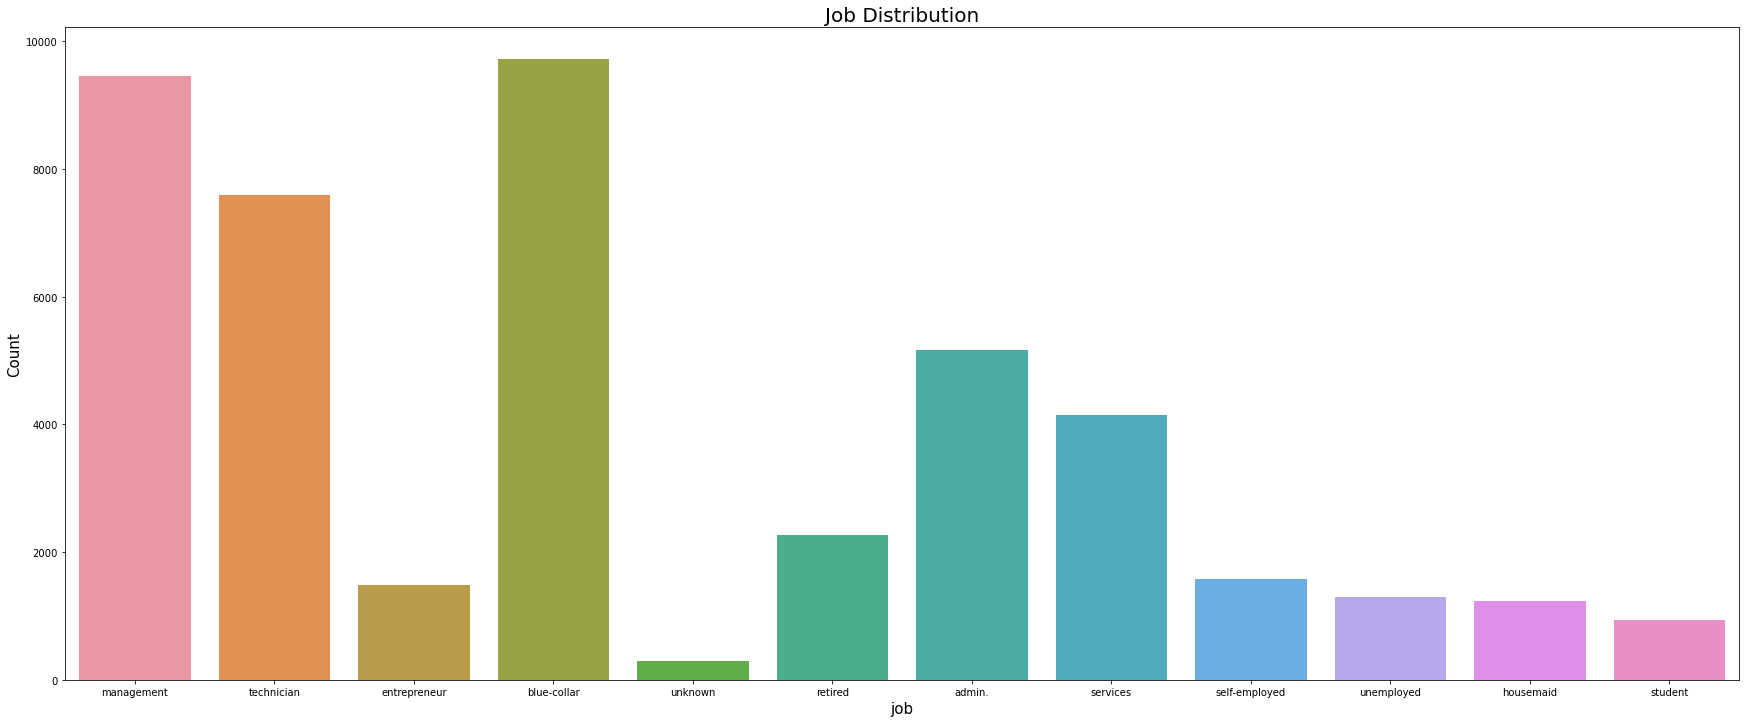

In [118]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = data)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

__Marital__

Text(0.5, 1.0, 'Marital Distribution')

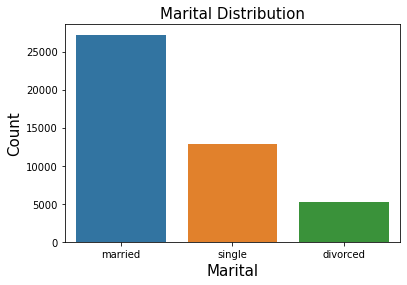

In [119]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = data)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

__Education__

Text(0.5, 1.0, 'Education Distribution')

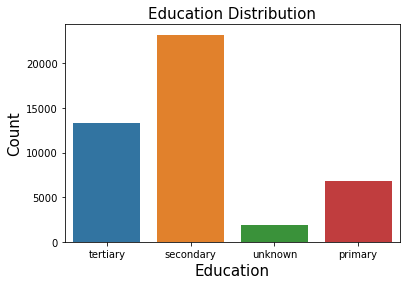

In [120]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = data)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

The clients having secondary education are more .And the clients having unknown eduction are less 

__Default__

Text(0.5, 1.0, 'Default Distribution')

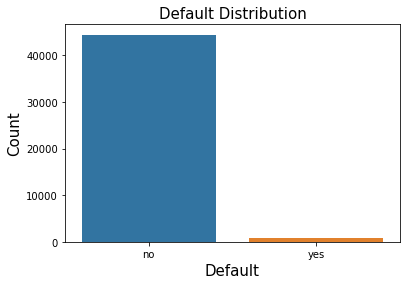

In [121]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = data)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

__Housing__

Text(0.5, 1.0, 'Housing Distribution')

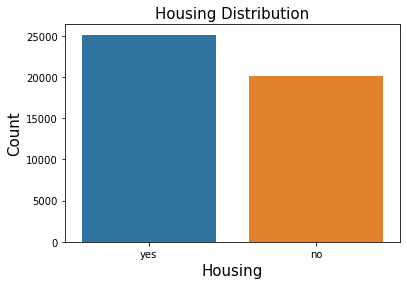

In [122]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = data)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

In [123]:
print('Housing:\n No Housing:'     , data[data['housing'] == 'no']     ['age'].count(),
              '\n Yes Housing:' , data[data['housing'] == 'yes']    ['age'].count())

Housing:
 No Housing: 20081 
 Yes Housing: 25130


The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

__Loan__

Text(0.5, 1.0, 'Loan Distribution')

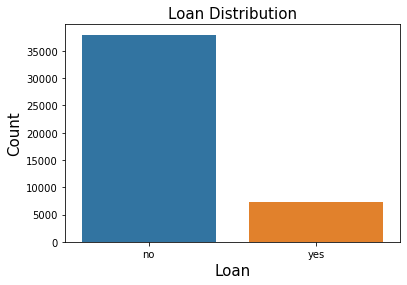

In [124]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = data)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [125]:
print('Loan:\n No Personal loan:'     , data[data['loan'] == 'no']     ['age'].count(),
              '\n Yes Personal Loan:' , data[data['loan'] == 'yes']    ['age'].count())

Loan:
 No Personal loan: 37967 
 Yes Personal Loan: 7244


The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count

__Contact__

Text(0.5, 1.0, 'Contact Distribution')

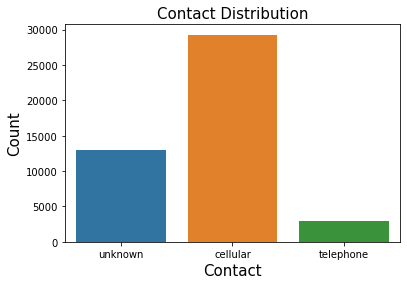

In [126]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = data)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

The count of a clients who can be contacted by Cellular is high that the others

__Month__

Text(0.5, 1.0, 'Monthly Distribution')

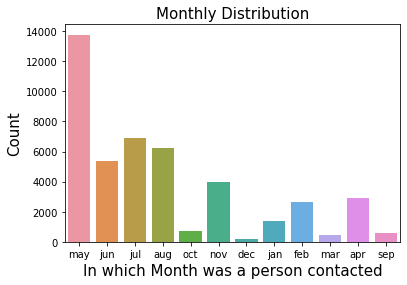

In [127]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = data)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

__Calculate the correlation matrix__

In [128]:
cor=data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


__Heatmap__

<AxesSubplot:>

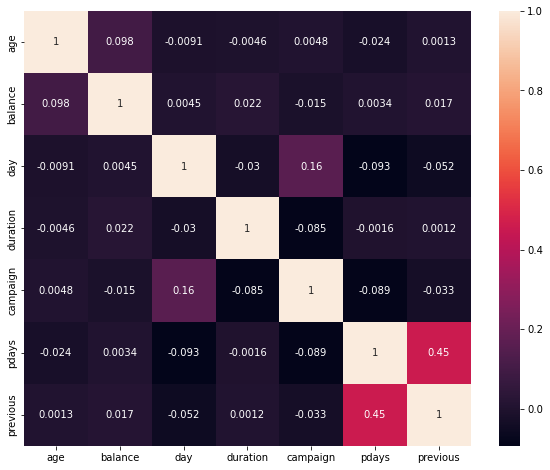

In [129]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

__Conclusion From EDA__

1.The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.¶

2.Here we can see the percentage of the outliers for 'Age' is less, so we can fit the model with and without them.

3.If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.

4.Married people are more ,we can see in graph clearly.

5.The clients having secondary education are more .And the clients having unknown eduction are less .

6.The clients having bydefault credit are less than those who don't have bydefault credit.

7.The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

8.The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.

9.The count of a clients who can be contacted by Cellular is high that the others.

10.The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

__Prepare the data to train a model__

In [130]:
# Label encoder order in alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 

data['contact']     = labelencoder_X.fit_transform(data['contact']) 
data['month']       = labelencoder_X.fit_transform(data['month']) 

In [131]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [132]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [133]:
print(data.shape)
data.head()


(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [134]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(data);

In [135]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [136]:
data.loc[(data['pdays'] == 999), 'pdays'] = 1
data.loc[(data['pdays'] > 0) & (data['pdays'] <= 10), 'pdays'] = 2
data.loc[(data['pdays'] > 10) & (data['pdays'] <= 20), 'pdays'] = 3
data.loc[(data['pdays'] > 20) & (data['pdays'] != 999), 'pdays'] = 4 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [137]:
data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [138]:
print(data.shape)
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [139]:
Final_data=data
print(Final_data.shape)
Final_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


__Applying the NB model and print the accuracy of NB model.__

In [140]:
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [141]:
X = Final_data.values[:,0:15]  ## Features
Y = Final_data.values[:,16]  ## Target.values[:,10]  ## Target

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [143]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [144]:
Y_pred = clf.predict(X_test)

In [145]:
NB=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.848938366263639


In [146]:
print('Confusion_matrix of NB:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix of NB:
[[10703  1327]
 [  722   812]]


__Applying Logistic Regression Model__

In [152]:
array = data.values
X = array[:,0:16] # select all rows and first 16 columns which are the attributes
Y = array[:,16]   # select all rows and the 17th column which is the classification "yes", "no"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [153]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR = model.score(X_test, y_test)
print('Accuracy:',LR)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR  # Accuracy of Logistic regression model

Accuracy: 0.8827779416101444
confusion_matrix:
[[11667   365]
 [ 1225   307]]


e:\Programs\Ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','Logistic Model'],
                'Score':  [NB,  LR]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,Logistic Model,0.882778
0,Gausian NB,0.848938
